## Introduction ##
This notebook demonstrates the basic of Machine learning using the IRIS data model. This is my hello world program in machine learning which I have compiled from numerous blogs and YouTube videos. I hope this notebook helps data scientists on their advent to the ML journey.
As mentioned earlier, everything mentioned here is learnt from blogs. 
Additionally, some activities might not be relevant to the problem and has been added to know how is it done.

You can execute the code samples by pressing "Fork Notebook" at top right of the screen.
I have thoroughly enjoyed creating this notebook, request you to up vote if you like it too. 

The notebook is divided into three parts:

 1. Preliminary data analysis
 2. Visualizations
 3. Using different classification techniques and comparison


----------

## Preliminary data analysis ##
We'll start by importing some of the basic libraries and the iris data set.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization library
import matplotlib.pyplot as plt #data visualization library
from sklearn.datasets import load_iris #sklearn library with datasets

irisRaw = load_iris() #importing iris dataset

Out of curiosity, I wanted to check how to convert a data set to a pandas data frame. An alternative would have been to directly import the csv provided by Kaggle into a pandas dataframe. Pandas is a library that provides data processing functionality and includes multiple helpful statistical methods.

In [2]:
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

# In case you wish to use the data set provided by Kaggle directly, you just need to uncomment the below code

#iris = pd.read_csv("../input/Iris.csv") # load the dataset
#iris.drop('Id',axis=1,inplace=True) # Drop id column
#iris['Species'] = iris['Species'].map({'Iris-setosa':0.0
#                                       ,'Iris-versicolor':1.0,'Iris-virginica':2.0}) # Replace values in species column
#iris.rename(columns = {'Species':'target'}, inplace = True) # Rename column as target

Lets take a look at couple of rows and few basic statistics for the dataset 

In [3]:
print("Top 5 rows\n")
print(iris.head(n=5))
print("\nStatistics for the dataset\n")
print(iris.describe())
print("\nStructure of data (rows,columns)\n")
print(iris.shape)

Top 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

Statistics for the dataset

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.8000

Analyzing the data description

* Inference from looking at the head
    1. There are 5 columns. Target column is what we want to predict and the other 4 columns, i.e. features is what we will be using to predict the target, i.e. labels
    2. Each row is also known as tuple

* Inference from the statistics
    1. We see the mean, standard deviation, minimum, maximum and 25%,50%,75% values
* Inference from shape
    1. There are 150 rows and 5 columns

Let's take a look at unique values in the target column

In [4]:
iris['target'].unique()

array([0., 1., 2.])

We have three unique values. You can use `irisRaw['target_names']` to check the names of the flowers. 
We have three flowers setosa, versicolor and virginica which maps to numbers 0, 1 and 2 respectively. Given that names of the flowers doesn't really matter, I will be referring to the flowers using the number in the rest of the discussion.

Let's see how to rename the columns

In [5]:
iris.columns = ['SPL','SPW','PTL','PTW','target']
iris.head(1)

,SPL,SPW,PTL,PTW,target
0,5.1,3.5,1.4,0.2,0.0


That was pretty straight forward. Next as a part of the data cleansing process, we need to check if there are any missing values

In [6]:
print("Do null value exist")
print(pd.isnull(iris).any())
print("\n\n Count of null values")
print(pd.isnull(iris).sum())

Do null value exist
SPL       False
SPW       False
PTL       False
PTW       False
target    False
dtype: bool


 Count of null values
SPL       0
SPW       0
PTL       0
PTW       0
target    0
dtype: int64


We can see that the data does not contain any null or missing data. This will generally not be the case in most real world problems.

Next, we start the quest to evaluate relationship between features across the labels which might help with the overall classification problem. We'll start by grouping the data set into different classes and describing the data.

In [7]:
labelGroups = iris.groupby('target')

for name, group in labelGroups:
    # print the name of the group
    print("\n\n",name)
    # print data for that group
    print(group.describe())



 0.0
            SPL        SPW        PTL        PTW  target
count  50.00000  50.000000  50.000000  50.000000    50.0
mean    5.00600   3.428000   1.462000   0.246000     0.0
std     0.35249   0.379064   0.173664   0.105386     0.0
min     4.30000   2.300000   1.000000   0.100000     0.0
25%     4.80000   3.200000   1.400000   0.200000     0.0
50%     5.00000   3.400000   1.500000   0.200000     0.0
75%     5.20000   3.675000   1.575000   0.300000     0.0
max     5.80000   4.400000   1.900000   0.600000     0.0


 1.0
             SPL        SPW        PTL        PTW  target
count  50.000000  50.000000  50.000000  50.000000    50.0
mean    5.936000   2.770000   4.260000   1.326000     1.0
std     0.516171   0.313798   0.469911   0.197753     0.0
min     4.900000   2.000000   3.000000   1.000000     1.0
25%     5.600000   2.525000   4.000000   1.200000     1.0
50%     5.900000   2.800000   4.350000   1.300000     1.0
75%     6.300000   3.000000   4.600000   1.500000     1.0
max     7

That's quite a lot of information. However, it's too difficult to understand the feature relationships. Let's check if we can use some visualization to represent it better.


----------
## Visualizations ##


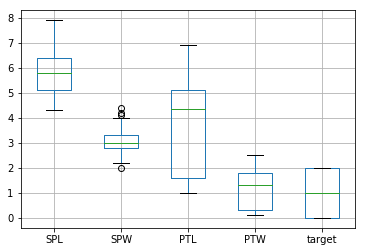

In [8]:
iris.boxplot(return_type='axes')

Features do not overlap, this might be a good sign. We'll now take a look at the histogram for the dataset

target
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SPL, dtype: object

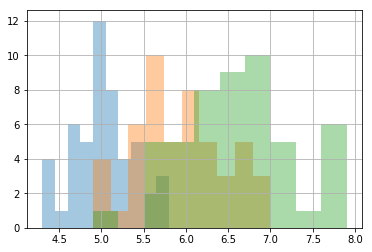

In [9]:
labelGroups['SPL'].hist(alpha=0.4)

Although the histogram tells us how a feature relates to the labels it doesn't help compare with other features.
We'll try plotting the scatter plot from the seaborn package over here. There is a [scatter plot][1] available in pandas.tools.plotting package as well. I will be using the one from seaborn since it shows relationship with the target class as well.


  [1]: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


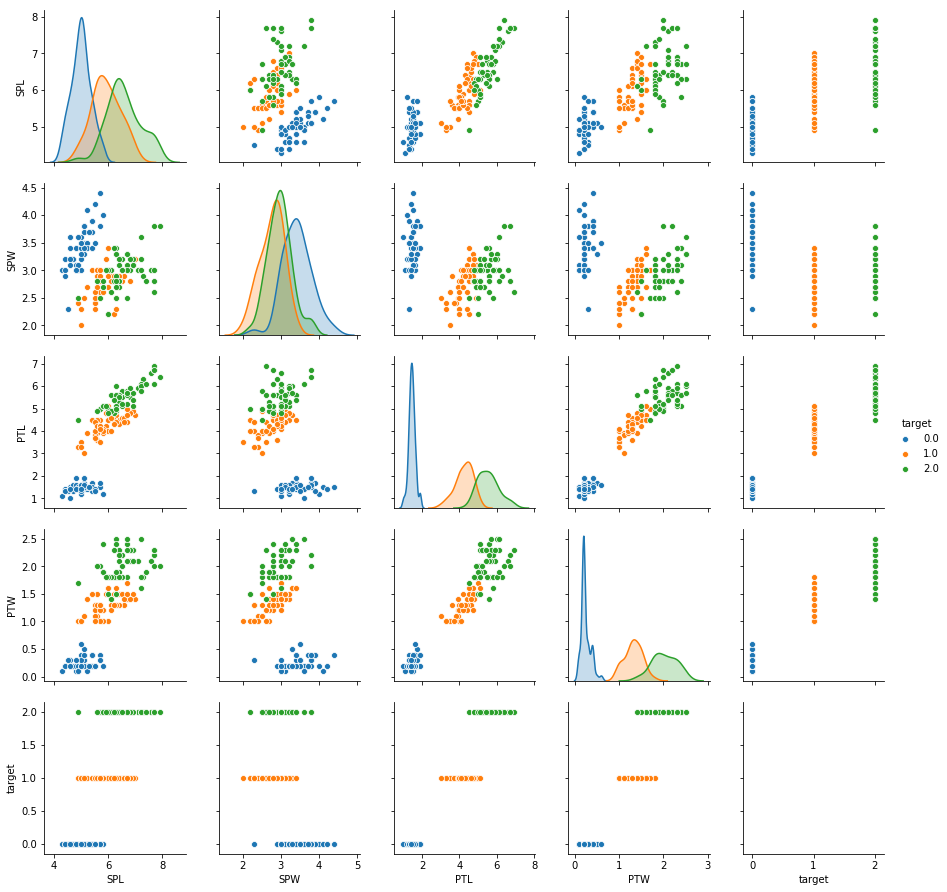

In [10]:
sns.pairplot(iris, hue="target")

Wow great! Finally we have the ball rolling. This tells us that petal length and petal width are highly correlated. There is some amount of correlation between sepal length and petal length as well. Petal length can be used to easily isolate class 0 over here.

Are there any visualizations that can be used to find out which feature distinguishes class 2. We'll be looking at the [parallel_coordinates][1] plot.


  [1]: https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-parallel-coordinates

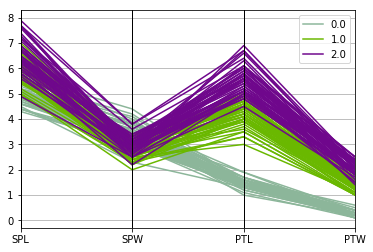

In [11]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "target")
plt.show()

That didn't help much. It provided me the same information as earlier, that class 0 can be easily distinguished from 1 and 2. Let's take a look at [swarmplot][1]  for the dataset


  [1]: https://seaborn.pydata.org/generated/seaborn.swarmplot.html

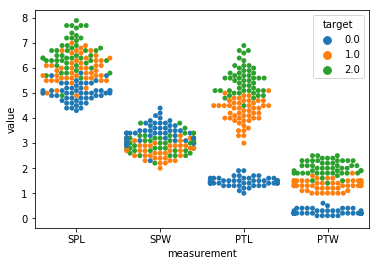

In [12]:
irisUnPvt = pd.melt(iris, "target", var_name="measurement")
sns.swarmplot(x="measurement", y="value", hue="target", data=irisUnPvt)
plt.show()

This further confirms that we can use petal length and petal width to isolate class 0. However, another interesting observations is that apart from a few outliers, petal length and petal width can be used to classify between classes 1 and 2 as well. This is by far one of my favorite visualizations.

Another interesting command to note over here is [pandas.melt][1]. For people who come from SQL background, melt command can be used to unpivot the data. For people who don't know what unpivot is, it means converting columns to rows. We'll print the top few rows to understand this better.


  [1]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

In [13]:
print(irisUnPvt.head(10),'\n\n')
print(irisUnPvt['measurement'].unique())

   target measurement  value
0     0.0         SPL    5.1
1     0.0         SPL    4.9
2     0.0         SPL    4.7
3     0.0         SPL    4.6
4     0.0         SPL    5.0
5     0.0         SPL    5.4
6     0.0         SPL    4.6
7     0.0         SPL    5.0
8     0.0         SPL    4.4
9     0.0         SPL    4.9 


['SPL' 'SPW' 'PTL' 'PTW']


We can see above that features sepal length, sepal width, petal length, petal width have been converted to row values under the measurement column. 

We have a fair idea about the correlation between the data points from the scatterplot. Let's plot the correlation matrix to check if we have missed something.

In [14]:
pearson = iris.corr(method='pearson')
print(pearson,"\n\n")
# assume target attr is the last, then remove corr with itself
corr_without_target = pearson.iloc[-1][:-1]
# attributes sorted from the most predictive
corr_without_target.sort_values(inplace=True)
print("Correlation of feature with the target")
print(corr_without_target)

             SPL       SPW       PTL       PTW    target
SPL     1.000000 -0.117570  0.871754  0.817941  0.782561
SPW    -0.117570  1.000000 -0.428440 -0.366126 -0.426658
PTL     0.871754 -0.428440  1.000000  0.962865  0.949035
PTW     0.817941 -0.366126  0.962865  1.000000  0.956547
target  0.782561 -0.426658  0.949035  0.956547  1.000000 


Correlation of feature with the target
SPW   -0.426658
SPL    0.782561
PTL    0.949035
PTW    0.956547
Name: target, dtype: float64


From the data, we can see that sepal length has a pretty high correlation with petal length and petal width.

Looking at correlation with the target, something isn't quiet right over here. -0.41 shouldn't be coming on the top over here. We want to sort by their absolute values instead

In [15]:
corr_without_target[abs(corr_without_target).argsort()[::-1]]

PTW    0.956547
PTL    0.949035
SPL    0.782561
SPW   -0.426658
Name: target, dtype: float64

We knew that petal width and petal length has very high correlation with the label, However, we can see that there is a good amount of correlation with sepal length as well. I have used pearsons correlation to get the information, however you can use [spearman or kendall][1] correlations as well based on your needs.

Next we'll see if there is a better way to get visualize the correlation matrix.


  [1]: https://pandas.pydata.org/pandas-docs/stable/computation.html#correlation

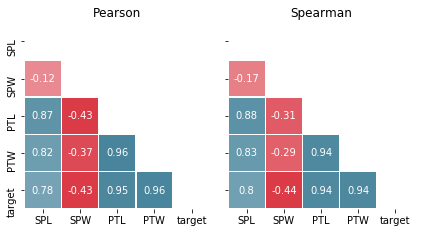

In [16]:
# Set up the matplotlib figure
f, ax = plt.subplots(1,2,sharey=True,sharex=True)


# Generate a custom diverging colormap
cmap = sns.diverging_palette(10,225, as_cmap=True)

# clear the upper half of the matrix
mask = np.zeros_like(pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set title for the left section
ax.flat[0].set_title("Pearson")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pearson, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar= False, ax=ax.flat[0],annot=True)

# Set title for the right section
ax.flat[1].set_title("Spearman")
scorrelation = iris.corr(method='spearman')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(scorrelation, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar= False, ax=ax.flat[1],annot=True)

f.tight_layout()
plt.show()

That looks like a pretty good way to visualize the correlation matrix. Before we move on to the next section, we'll take a brief look at how to perform Principal Component Analysis (PCA). 


----------
## Principal Component Analysis (in brief) ##
PCA is a feature reduction technique. Feature reduction is not to be confused with feature elimination. Complexity of a classification model increases if there are large number of features. Although the current example has only 4 features, real life ML problems will have features much more than that. In such cases, it is better to perform PCA to reduce the number of features. Pretty good explanation of [what is PCA can be found over here][1]. 
PCA can also be used as an unsupervised learning technique to derive early inference of the data.
Let's start with PCA now.


  [1]: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

Amount of variance explained by each component
[0.92461872 0.05306648 0.01710261]


 Amount of variance considered from each components
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


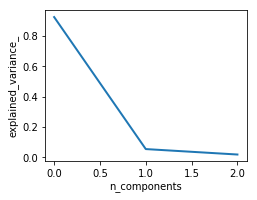

In [17]:
from sklearn.decomposition import PCA # Import PCA from the library
pca = PCA(n_components=3) # Reduce the number of components to three.
pca.fit(iris[['SPL','SPW','PTL','PTW']])

print("Amount of variance explained by each component")
print(pca.explained_variance_ratio_)
print("\n\n","Amount of variance considered from each components")
print(pca.components_)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

As we can see, PCA gave three outputs. PCA1 explains approximately 90% of the variance. Also if you check PCA1 has considered maximum amount of variance from the third feature that is petal length. You can apply dimensionality reduction to input data set using the [transform method][1] and use it for rest of the classification purposes.